In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('../input/SolarEnergy/SolarPrediction.csv')

In [3]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


###### Data Exploration and Data Visualization

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [5]:
data.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


In [6]:
data.isnull().sum()

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

<AxesSubplot:>

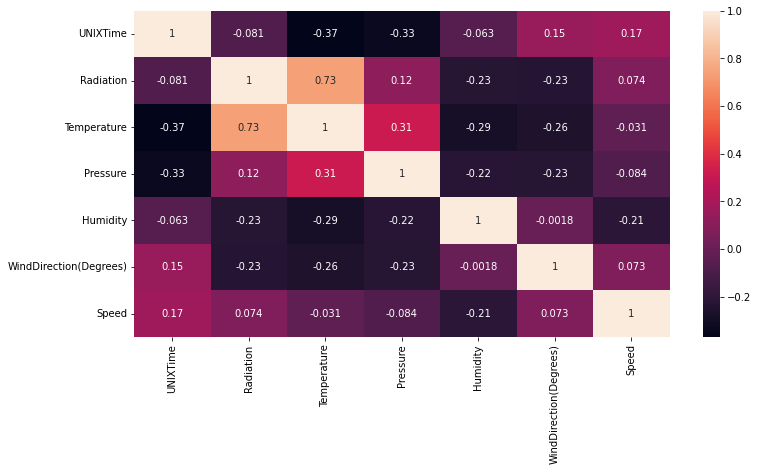

In [7]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True)

<AxesSubplot:xlabel='Temperature', ylabel='Count'>

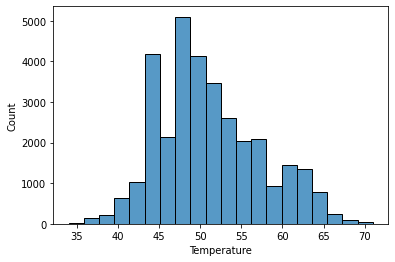

In [8]:
sns.histplot(x=data['Temperature'],bins=20)

<AxesSubplot:xlabel='Pressure', ylabel='Count'>

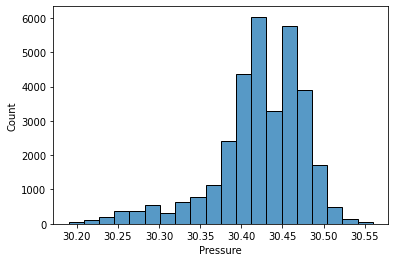

In [9]:
sns.histplot(x=data['Pressure'],bins=20)

<AxesSubplot:xlabel='Temperature', ylabel='Pressure'>

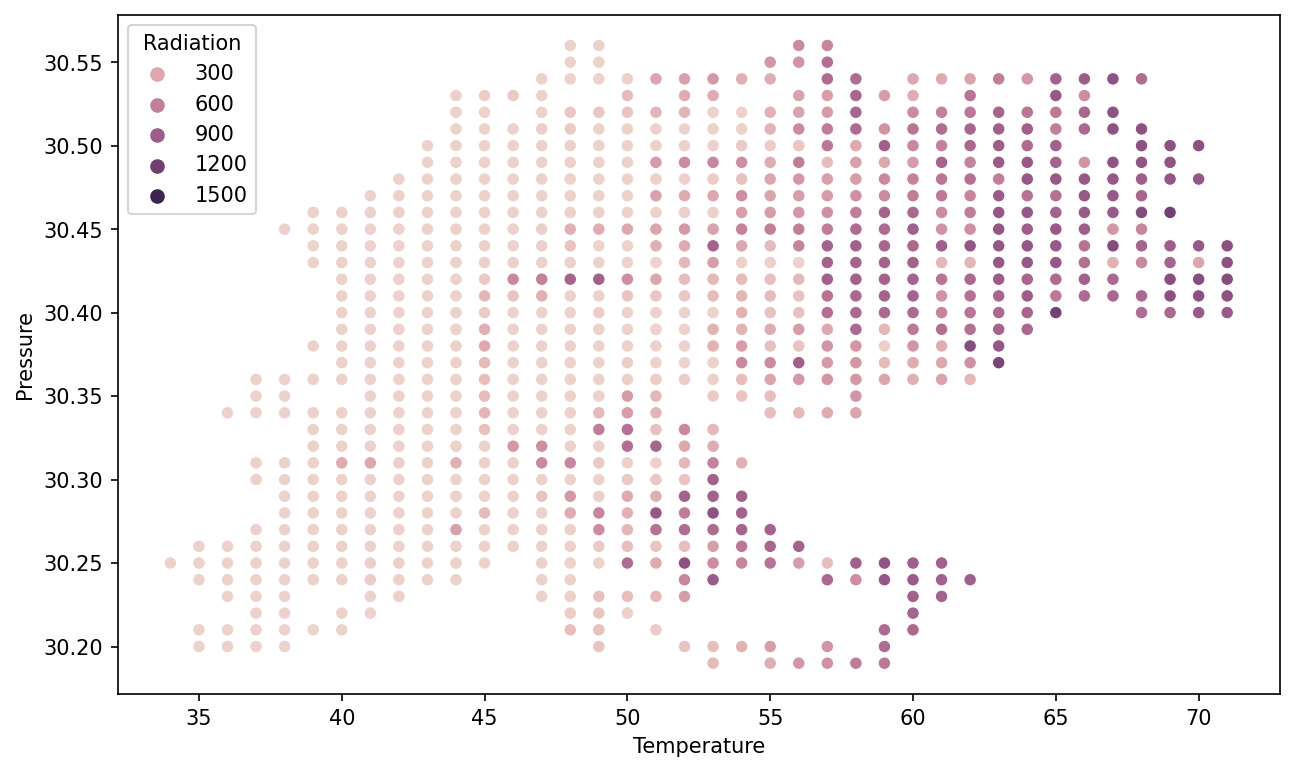

In [10]:
plt.figure(figsize=(10,6),dpi=150)
sns.scatterplot(x=data['Temperature'],y=data['Pressure'],hue=data['Radiation'])

<AxesSubplot:xlabel='WindDirection(Degrees)', ylabel='Count'>

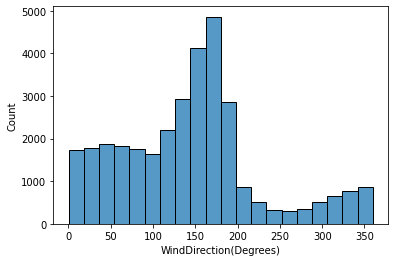

In [11]:
sns.histplot(x=data['WindDirection(Degrees)'],bins=20)

<AxesSubplot:xlabel='Humidity', ylabel='Count'>

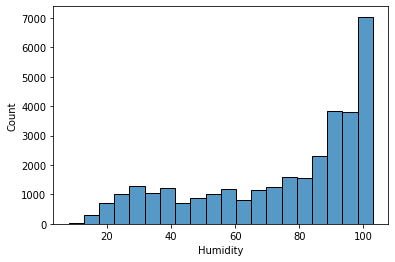

In [12]:
sns.histplot(x=data['Humidity'],bins=20)

<AxesSubplot:xlabel='Speed', ylabel='Count'>

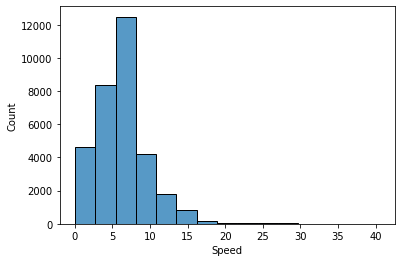

In [13]:
sns.histplot(x=data['Speed'],bins=15)

<AxesSubplot:xlabel='Speed', ylabel='WindDirection(Degrees)'>

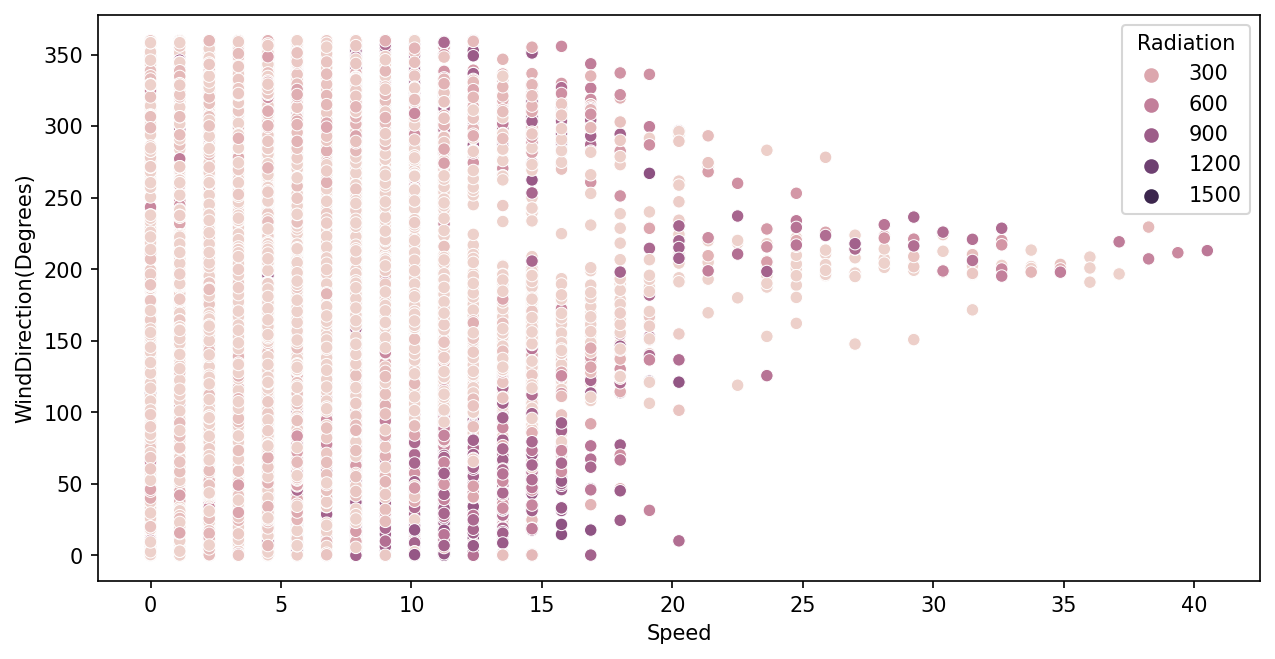

In [14]:
plt.figure(figsize=(10,5),dpi=150)
sns.scatterplot(y=data['WindDirection(Degrees)'],x=data['Speed'],hue=data['Radiation'])

<AxesSubplot:xlabel='Humidity', ylabel='Speed'>

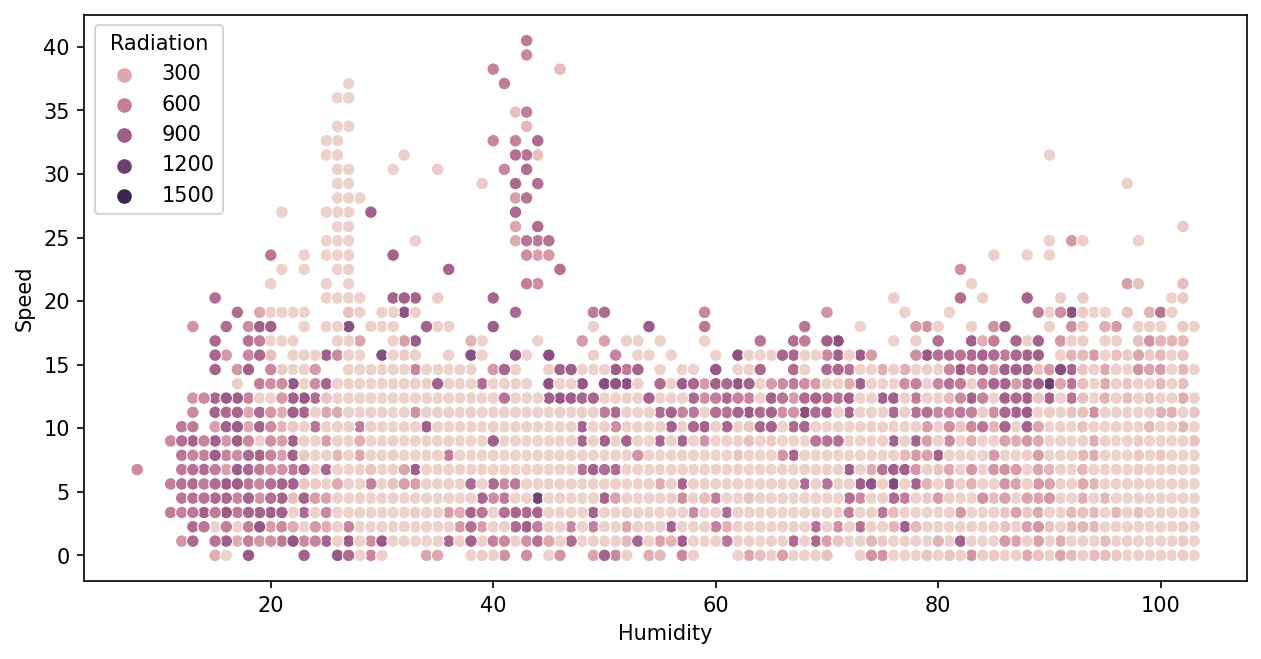

In [15]:
plt.figure(figsize=(10,5),dpi=150)
sns.scatterplot(y=data['Speed'],x=data['Humidity'],hue=data['Radiation'])

###### Extracting the 'Hours' from the TimeSunSet and TimeSunRise

In [16]:
data['TimeSunSet'].unique()

array(['18:13:00', '18:14:00', '18:15:00', '18:16:00', '18:17:00',
       '18:18:00', '18:19:00', '18:20:00', '18:21:00', '18:22:00',
       '18:23:00', '18:24:00', '18:25:00', '18:26:00', '18:27:00',
       '18:28:00', '18:29:00', '18:30:00', '18:31:00', '18:32:00',
       '18:33:00', '18:34:00', '18:35:00', '18:36:00', '18:37:00',
       '18:38:00', '17:49:00', '17:50:00', '17:51:00', '17:52:00',
       '17:53:00', '17:54:00', '17:55:00', '17:56:00', '17:57:00',
       '17:58:00', '17:59:00', '18:00:00', '18:01:00', '18:02:00',
       '18:03:00', '18:04:00', '18:05:00', '18:06:00', '18:07:00',
       '18:08:00', '18:09:00', '18:10:00', '18:11:00', '17:42:00',
       '17:43:00', '17:44:00', '17:45:00', '17:46:00', '17:47:00',
       '17:48:00'], dtype=object)

In [17]:
data['TimeSunSet']=data['TimeSunSet'].apply(lambda x:(x).split(":")[0])

In [18]:
data['TimeSunSet(in Hrs)']=data['TimeSunSet']

In [19]:
data['TimeSunRise(in Hrs)']=data['TimeSunRise'].apply(lambda x:(x).split(":")[0])

In [20]:
data['TimeSunSet(in Hrs)']=data['TimeSunSet(in Hrs)'].apply(lambda x:int(x))

In [21]:
data['TimeSunRise(in Hrs)']=data['TimeSunRise(in Hrs)'].apply(lambda x:int(x))

###### Extracting Month and Day from Data

In [22]:
data['Month']=data['Data'].apply(lambda x:(x).split("/")[0])

In [23]:
data['Day']=data['Data'].apply(lambda x:(x).split("/")[1])

In [24]:
data['Month']=data['Month'].apply(lambda x:int(x))

In [25]:
data['Day']=data['Day'].apply(lambda x:int(x))

###### Seperating Time into Hours , Minutes and Seconds

In [26]:
data['Time_Hrs']=data['Time'].apply(lambda x:(x).split(":")[0])

In [27]:
data['Time_Mins']=data['Time'].apply(lambda x:(x).split(":")[1])

In [28]:
data['Time_Secs']=data['Time'].apply(lambda x:(x).split(":")[2])

In [29]:
data['Time_Mins']=data['Time_Mins'].apply(lambda x:int(x))

In [30]:
data['Time_Secs']=data['Time_Secs'].apply(lambda x:int(x))

<AxesSubplot:>

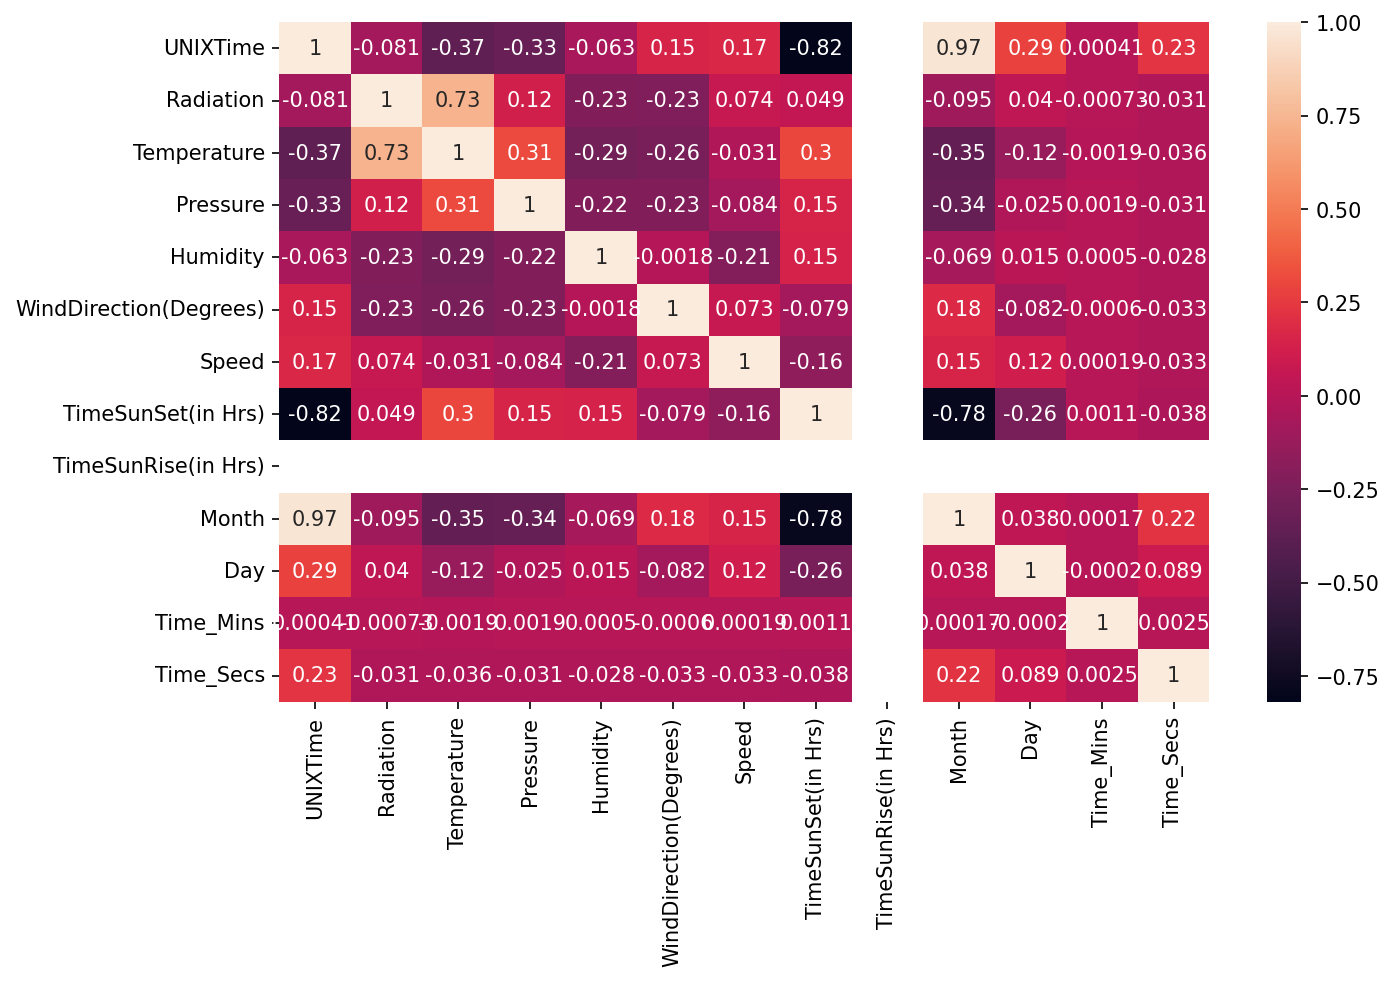

In [31]:
plt.figure(figsize=(10,6),dpi=150)
sns.heatmap(data.corr(),annot=True)

In [32]:
data.shape

(32686, 18)

###### Modelling

In [33]:
X=data.drop(['Data','Time','TimeSunRise','TimeSunSet','Radiation'],axis=1)

In [34]:
y=data['Radiation']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.30, random_state=101)

In [37]:
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size=0.30, random_state=101)

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler=StandardScaler()

In [40]:
X_train=scaler.fit_transform(X_train)

In [41]:
X_val=scaler.fit_transform(X_val)

In [42]:
X_test=scaler.transform(X_test)

In [43]:
from sklearn.linear_model import LinearRegression,ElasticNet

In [44]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [45]:
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [46]:
ElasticNet_model=ElasticNet()
ElasticNet_model.fit(X_train,y_train)

ElasticNet()

In [47]:
RandomForest_model=RandomForestRegressor()
RandomForest_model.fit(X_train,y_train)

RandomForestRegressor()

In [48]:
GradientBoosting_model=GradientBoostingRegressor()
GradientBoosting_model.fit(X_train,y_train)

GradientBoostingRegressor()

##### Model Evalutation

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [50]:
def report(model):
    preds = model.predict(X_val)
    MAE= mean_absolute_error(preds,y_val)
    MSE=mean_squared_error(preds,y_val)
    RMSE=np.sqrt(MSE)
    print('Mean Absolute Error: '+str(MAE))
    print('Root Mean Squared Error: '+str(RMSE))
    print("Test Score:" + str(model.score(X_val,y_val)))

In [51]:
print('Linear Regression')
report(linear_model)

Linear Regression
Mean Absolute Error: 146.92967731813846
Root Mean Squared Error: 194.48801942638732
Test Score:0.628740998899795


In [52]:
print('ElasticNet')
report(ElasticNet_model)

ElasticNet
Mean Absolute Error: 165.83236808574244
Root Mean Squared Error: 220.09778491027947
Test Score:0.5245305387699674


In [53]:
print('Random Forest Regressor')
report(RandomForest_model)

Random Forest Regressor
Mean Absolute Error: 33.59170157342657
Root Mean Squared Error: 86.22728775646198
Test Score:0.9270238855570581


In [54]:
print('Gradient Boosting Regressor')
report(GradientBoosting_model)

Gradient Boosting Regressor
Mean Absolute Error: 60.49890001563581
Root Mean Squared Error: 110.29060826641174
Test Score:0.8806098911156897


Since RandomForestRegressor performed better than the rest of the models taken for evaluation, we will proceed further with the RandomForestRegressor model for Cross Validation and see if we can increase the performance after hyperparameter tuning

##### GridSearchCV

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
n_estimators=[50,60,70,80,90,100,110,120]
max_features=[2,3,4,5,6,7,8,9,10,11,12,13]

In [57]:
param_grid={'n_estimators':n_estimators,'max_features':max_features}

In [58]:
grid_model=GridSearchCV(RandomForest_model,param_grid)

In [59]:
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13],
                         'n_estimators': [50, 60, 70, 80, 90, 100, 110, 120]})

In [60]:
grid_model.best_params_

{'max_features': 10, 'n_estimators': 110}

##### Final Predictions and Evaluation after Hyperparameter Tuning

In [61]:
preds_final = grid_model.predict(X_test)
MAE= mean_absolute_error(preds_final,y_test)
MSE=mean_squared_error(preds_final,y_test)
RMSE=np.sqrt(MSE)
print('Mean Absolute Error: '+str(MAE))
print('Root Mean Squared Error: '+str(RMSE))
print("Test Score:" + str(grid_model.score(X_test,y_test)))

Mean Absolute Error: 32.32343025770965
Root Mean Squared Error: 83.81961373167562
Test Score:0.9288664275448061


After Hyperparamter Tuning in the RandomForestRegressor model we get a negligible increase in the performance